# Notebook for the study of the E.Coli Core model

# <font color='red'> [1] Build the model of E.Coli Core </font> 

## <font color='green'> [1.1] Importation of the package </font> 

In [1]:
import sys
sys.path.append('../')

from main import *

In [2]:
model = MODEL()

model.read_SBtab("../Exemples/SBtab/Marco/model.tsv")

In [3]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Driving force
NDPK5,"{'M_atp_c': -1, 'M_dgdp_c': -1, 'M_adp_c': 1, ...",1,True,1,1.0
SHK3Dr,"{'M_3dhsk_c': -1, 'M_h_c': -1, 'M_nadph_c': -1...",1,True,1,1.0
NDPK6,"{'M_atp_c': -1, 'M_dudp_c': -1, 'M_adp_c': 1, ...",1,True,1,1.0
NDPK8,"{'M_atp_c': -1, 'M_dadp_c': -1, 'M_adp_c': 1, ...",1,True,1,1.0
DHORTS,"{'M_dhor__S_c': -1, 'M_h2o_c': -1, 'M_cbasp_c'...",1,True,1,1.0
...,...,...,...,...,...
VPAMTr,"{'M_3mob_c': -1, 'M_ala__L_c': -1, 'M_pyr_c': ...",1,True,1,1.0
PIt2rpp,"{'M_h_p': -1, 'M_pi_p': -1, 'M_h_c': 1, 'M_pi_...",1,False,1,1.0
PItpp,"{'M_pi_c': -1, 'M_pi_p': 1}",1,False,1,1.0
SUCCt1pp,"{'M_succ_c': -1, 'M_succ_p': 1}",1,False,1,1.0


In [3]:
model.default_JSON = "../Exemples/SBtab/Marco/model_iCH360.json"
model.default_Escher   = "../Exemples/SBtab/Marco/map_iCH360.json"

model.escher_reference()

Builder(height=600, metabolite_data={'M_atp_c': 1.0, 'M_dgdp_c': 1.0, 'M_adp_c': 1.0, 'M_dgtp_c': 1.0, 'M_3dhs…

In [6]:
pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')

In [7]:
model.elasticity.s.half_satured()

In [8]:
model.Jacobian

(2.9770500681584586e-16+1.1859154902865332e-17j)
(2.9770500681584586e-16-1.1859154902865332e-17j)
The jacobian matrix have positives eigen values, that could lead to an unstable state


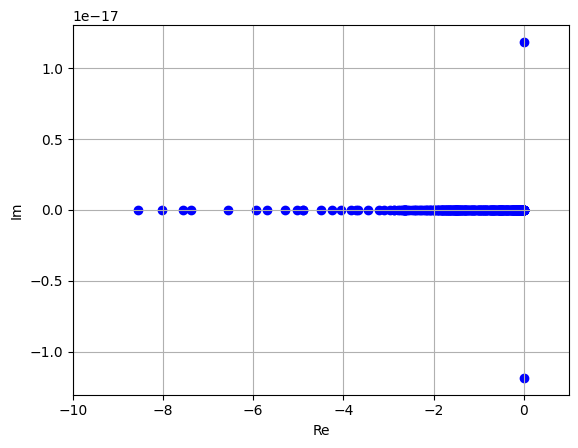

In [11]:
model.plot_eigen(xlim=(-10,1))

## <font color='green'> [1.2] Creation of the model and read of the SBTab file </font> 

In [ ]:
model = MODEL()

SBTab_file = "../Exemples/SBTab/Model.tsv"
model.read_SBtab(filepath=SBTab_file)

## <font color='green'> [1.3] Read of premade options files </font> 

Options file can be read to add enzymes to every reaction, to consider them and the external metabolites as parameters of the model.

In [ ]:
file_path = "../Exemples/SBTab/options.csv"
model.setup(file_path=file_path)

Name of the removed parameter : Temperature


The same for adding regulation arrows between metabolite and flux of the model.

In [ ]:
file_reg = "../Exemples/SBTab/e_coli_core_regulation.tsv"
#model.regulations.read_file(file_path=file_reg)

In [ ]:
model.regulations.df

,Regulated flux,Regulator,Coefficient of regulation,Type regulation,Activated


## <font color='green'> [1.4] Display the Escher map of E.Coli Core </font> 

We can display the reference state in a Escher map

In [1]:
model.default_JSON = "../Exemples/SBTab/e_coli_core_model.json"
model.default_Escher = "../Exemples/SBTab/e_coli_core_map.json"

NameError: name 'model' is not defined

In [ ]:
model.escher_reference(model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'acald_c': 0.95573709, 'coa_c': 2.74, 'nad_c': 4.2256266, 'accoa_c': 1.21…

In [ ]:
model.R_normalized.at["atp_c","enzyme_ATPS4r_para"]

-0.02440670790667154

In [ ]:
flux_name = "ADK1"
for meta in model.elasticity.s.df.columns :
    coeff = model.elasticity.s.df.at[flux_name, meta]
    model.elasticity.s.change(flux_name, meta, value=coeff*0.0001)

In [ ]:
model.elasticity.s.df.loc[flux_name]

NameError: name 'flux_name' is not defined

In [ ]:
model.escher_information(studied="enzyme_ATPS4r_para", result="r", normalized=True, model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'acald_c': -1, 'coa_c': 1, 'nad_c': 1, 'accoa_c': -1, 'h_c': 1, 'nadh_c':…

In [ ]:
fregtb.

SyntaxError: invalid syntax (316868297.py, line 1)

# <font color='red'> [2] Launch simulation </font> 

## <font color='green'> [2.1] Response matrix </font> 

Once your model is well-built and the elasticity matrices are well-defined, you can compute the linear response matrix $R$ of the system to parameter perturbation

In [ ]:
model.R

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPS4r_para,enzyme_Biomass_Ecoli_core_w_GAM_para,...,h_e_para,co2_e_para,for_e_para,fum_e_para,glc__D_e_para,h2o_e_para,nh4_e_para,o2_e_para,pi_e_para,succ_e_para
acald_c,-0.596381,1.403619,0.165425,-0.090302,-0.090302,0.165425,-0.021982,-0.006125,-0.125207,-0.002668,...,0.282030,-0.164121,-0.038743,0.021132,0.025745,-0.027607,-0.007283,-0.027457,-0.004909,0.084514
coa_c,-0.178823,-0.178823,-0.084243,0.101171,0.101171,-0.084243,0.021608,-0.074566,0.016564,0.010944,...,-0.598258,0.002036,0.101986,-0.197709,0.025866,0.323565,0.029877,0.048568,0.020137,-0.243107
nad_c,-0.172570,-0.172570,-0.002247,-0.142186,-0.142186,-0.002247,-0.001590,-0.073283,0.230948,0.001229,...,0.575311,0.156897,-0.065772,0.107870,-0.033206,-0.162450,0.003355,-0.010429,0.002261,-0.030602
accoa_c,0.295214,0.295214,0.224754,-0.352087,-0.352087,0.224754,-0.028896,-0.224853,-0.041715,0.004185,...,0.134436,-0.029380,-0.097379,0.049507,0.006607,-0.081098,0.011424,0.001022,0.007700,-0.135459
h_c,-0.011939,-0.011939,0.017361,-0.011718,-0.011718,0.017361,0.003362,-0.008530,0.269760,0.003882,...,0.981987,0.016968,-0.009665,0.010787,0.004338,0.024549,0.010597,-0.028227,0.007142,0.000176
nadh_c,0.172570,0.172570,0.002247,0.142186,0.142186,0.002247,0.001590,0.073283,-0.230948,-0.001229,...,-0.575311,-0.156897,0.065772,-0.107870,0.033206,0.162450,-0.003355,0.010429,-0.002261,0.030602
ac_c,0.177364,0.177364,-0.510875,-0.144477,-0.144477,1.489125,0.006715,-0.048224,-0.253515,0.003539,...,-0.108032,-0.039968,-0.012631,0.009193,0.011720,0.054083,0.009661,0.035106,0.006511,0.088582
atp_c,-0.039383,-0.039383,-0.179794,0.015854,0.015854,-0.179794,0.394485,-0.005186,-0.168364,-0.028712,...,1.123875,0.040913,-0.134953,0.188800,-0.069829,-0.635188,-0.078383,-0.076323,0.947170,-0.158499
actp_c,0.310733,0.310733,0.812458,-0.279391,-0.279391,0.812458,-0.028629,-0.095271,-0.380848,-0.020951,...,0.898618,-0.011555,-0.163798,0.210816,-0.047594,-0.501296,-0.057196,-0.033710,0.961450,0.012156
adp_c,-0.007327,-0.007327,0.003359,-0.005426,-0.005426,0.003359,0.439905,-0.014893,-0.024786,0.003199,...,-0.008819,-0.010501,-0.006082,0.007156,0.005542,-0.001179,0.008732,-0.000628,0.005885,0.006685


## <font color='green'> [2.2] Covariance </font> 

The uncertainty on the parameters spreads through the cell and then leads to a certain variability in the internal components of the cell's metabolism

In [ ]:
model.covariance
#gln_c = 46 !

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPS4r_para,enzyme_Biomass_Ecoli_core_w_GAM_para,...,PYK,RPE,RPI,SUCCt2_2,SUCCt3,SUCOAS,TALA,TKT1,TKT2,TPI
enzyme_ACALD_para,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.060708,-0.012245,0.004682,-0.033303,0.051211,-0.003063,-0.005882,-0.005882,-6.362550e-03,-0.021423
enzyme_ACALDt_para,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.060708,-0.012245,0.004682,-0.033303,0.051211,-0.003063,-0.005882,-0.005882,-6.362550e-03,-0.021423
enzyme_ACKr_para,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.016522,-0.002361,0.005187,-0.057399,0.031358,-0.028377,-0.001848,-0.001848,-5.124360e-04,-0.009869
enzyme_ACONTa_para,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.015644,-0.029215,0.015481,-0.032755,0.050331,-0.028596,-0.014753,-0.014753,-1.446168e-02,0.007688
enzyme_ACONTb_para,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.015644,-0.029215,0.015481,-0.032755,0.050331,-0.028596,-0.014753,-0.014753,-1.446168e-02,0.007688
enzyme_ACt2r_para,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-0.016522,-0.002361,0.005187,-0.057399,0.031358,-0.028377,-0.001848,-0.001848,-5.124360e-04,-0.009869
enzyme_ADK1_para,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.275814,-0.014978,0.012671,-0.012548,0.007506,-0.022340,-0.008353,-0.008353,-6.625541e-03,-0.002661
enzyme_AKGDH_para,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,-0.032216,-0.024731,0.010859,-0.005695,0.018490,-0.167044,-0.012114,-0.012114,-1.261642e-02,0.007596
enzyme_ATPS4r_para,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.004277,0.020864,-0.015797,-0.188085,-0.216555,-0.004596,0.011326,0.011326,9.537940e-03,-0.002826
enzyme_Biomass_Ecoli_core_w_GAM_para,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,-0.003136,0.000753,-0.000801,-0.002020,-0.003803,-0.001395,0.000447,0.000447,3.059648e-04,0.001251


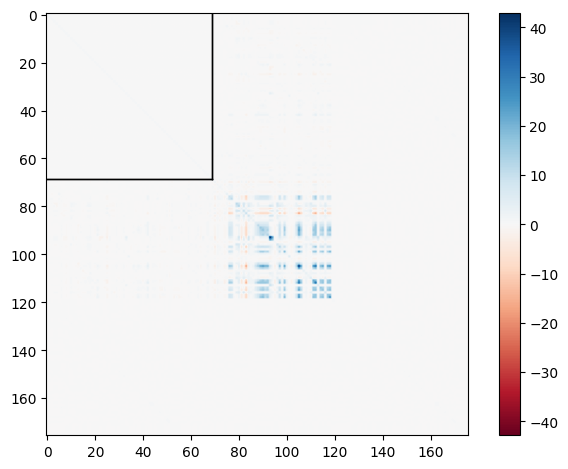

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: >,
 <matplotlib.image.AxesImage at 0x7604a3e61f30>)

In [ ]:
model.plot(result="cov")

Because the dependency between every elements of the model is linear, it is therefore possible to compute the matrix of correlation

metabolites = model.elasticity.s.df.columns
for flux in model.elasticity.s.df.index :
    if model.elasticity.s.df.at[flux, "amp_c"] != 0 :
        for meta in metabolites :
            ela = model.elasticity.s.df.at[flux, meta]
            model.elasticity.s.change(flux, meta, value=0.0001*ela)


In [ ]:
#model.metabolites.change("h_e", external=False)

In [ ]:
model.elasticity.s.df.loc[["Biomass_Ecoli_core_w_GAM"]].at["Biomass_Ecoli_core_w_GAM", "amp_c"]

-0.0

In [ ]:
np.max(model.R.to_numpy())

3.7826212346952253

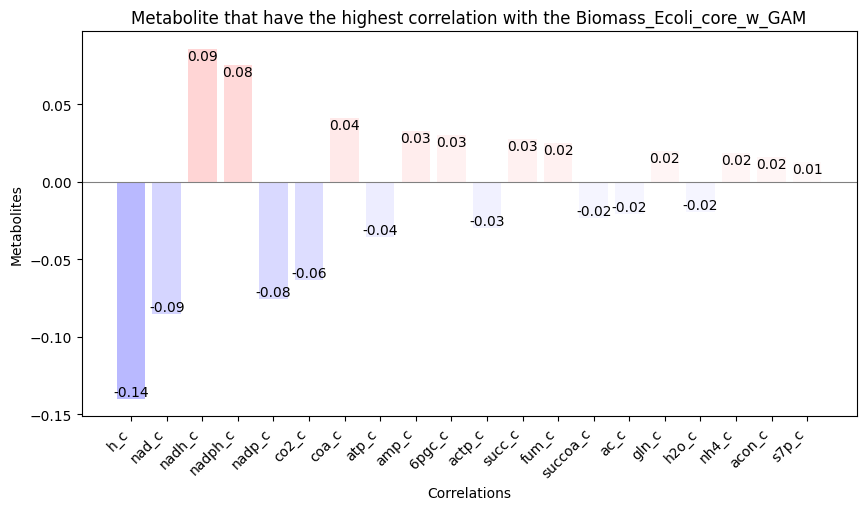

In [ ]:
model.display_best("Biomass_Ecoli_core_w_GAM", 20)

In [ ]:
model.rho().at["Biomass_Ecoli_core_w_GAM", "atp_c"]

-0.03545845825578179

In [ ]:
model.elasticity.s.df.loc[["Biomass_Ecoli_core_w_GAM"]].T

,Biomass_Ecoli_core_w_GAM
acald_c,-0.000
coa_c,-1.875
nad_c,1.775
accoa_c,1.875
h_c,-29.905
nadh_c,-1.775
ac_c,-0.000
atp_c,29.905
actp_c,-0.000
adp_c,-29.905


In [ ]:
model.N.columns

Index(['ACALD', 'ACALDt', 'ACKr', 'ACONTa', 'ACONTb', 'ACt2r', 'ADK1', 'AKGDH',
       'ATPS4r', 'Biomass_Ecoli_core_w_GAM', 'CO2t', 'CS', 'CYTBD', 'ENO',
       'FBA', 'FORti', 'FRD7', 'FUM', 'FUMt2_2', 'G6PDH2r', 'GAPD', 'GLCpts',
       'GLUDy', 'GLUN', 'GND', 'H2Ot', 'ICDHyr', 'ICL', 'MALS', 'MDH', 'ME2',
       'NADH16', 'NADTRHD', 'NH4t', 'O2t', 'PDH', 'PFK', 'PFL', 'PGI', 'PGK',
       'PGL', 'PGM', 'PIt2r', 'PPC', 'PPCK', 'PPS', 'PTAr', 'PYK', 'RPE',
       'RPI', 'SUCCt2_2', 'SUCCt3', 'SUCOAS', 'TALA', 'TKT1', 'TKT2', 'TPI'],
      dtype='object')

In [ ]:
model.N.loc["atp_c"]

ACALD                        0.00
ACALDt                       0.00
ACKr                        -1.00
ACONTa                       0.00
ACONTb                       0.00
ACt2r                        0.00
ADK1                        -1.00
AKGDH                        0.00
ATPS4r                       1.00
Biomass_Ecoli_core_w_GAM   -59.81
CO2t                         0.00
CS                           0.00
CYTBD                        0.00
ENO                          0.00
FBA                          0.00
FORti                        0.00
FRD7                         0.00
FUM                          0.00
FUMt2_2                      0.00
G6PDH2r                      0.00
GAPD                         0.00
GLCpts                       0.00
GLUDy                        0.00
GLUN                         0.00
GND                          0.00
H2Ot                         0.00
ICDHyr                       0.00
ICL                          0.00
MALS                         0.00
MDH           

In [ ]:
model.metabolites.df.loc[["h_e"]]

,External,Concentration,Unit
h_e,True,0.986902,mmol/gDW


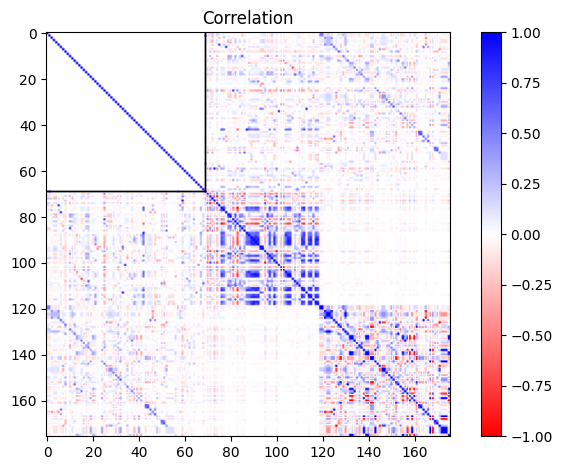

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Correlation'}>,
 <matplotlib.image.AxesImage at 0x7604a0495ff0>)

In [ ]:
model.plot(result="rho")

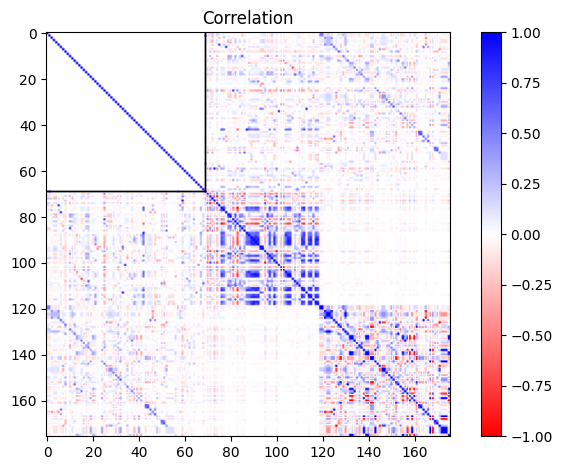

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Correlation'}>,
 <matplotlib.image.AxesImage at 0x7604a03bed70>)

In [ ]:
model.plot("rho")

The plot can be divided into 3 sections of elements.
- First, the parameters that are independent of each other
- Then The metabolites, on which the parameter doesn't have much impact because the parameter acts via the elasticity
- Finally, the flux. We can observe a diagonal of positive correlation between flux and parameters due to the impact of the enzyme. Furthermore, the same flux is influenced by a lot of metabolites. The fluxes that have the same behavior as metabolites are mostly aligned. In the case of a linear network without branches, the flux would be correlated.

## <font color='green'> [2.3] Value of information in the cell </font> 

The uncertainty on internal components of the cell results in a transmission of information through the system. We can therefore use the shared information as a metric of dependency between the elements.

In [ ]:
model.MI

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPS4r_para,enzyme_Biomass_Ecoli_core_w_GAM_para,...,PYK,RPE,RPI,SUCCt2_2,SUCCt3,SUCOAS,TALA,TKT1,TKT2,TPI
enzyme_ACALD_para,inf,-0.000000e+00,-0.000000e+00,-0.000000,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,...,3.853888e-03,1.266030e-03,6.764442e-04,1.015944e-03,2.437020e-03,2.785726e-05,1.155723e-03,1.155723e-03,1.380248e-03,5.093454e-03
enzyme_ACALDt_para,-0.000000e+00,inf,-0.000000e+00,-0.000000,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,...,3.853888e-03,1.266030e-03,6.764442e-04,1.015944e-03,2.437020e-03,2.785726e-05,1.155723e-03,1.155723e-03,1.380248e-03,5.093454e-03
enzyme_ACKr_para,-0.000000e+00,-0.000000e+00,inf,-0.000000,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,...,2.844494e-04,4.699391e-05,8.305293e-04,3.024068e-03,9.123893e-04,2.397093e-03,1.139645e-04,1.139645e-04,8.940845e-06,1.076480e-03
enzyme_ACONTa_para,-0.000000e+00,-0.000000e+00,-0.000000e+00,inf,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,...,2.550068e-04,7.249814e-03,7.445889e-03,9.827315e-04,2.353851e-03,2.434257e-03,7.314339e-03,7.314339e-03,7.172062e-03,6.529812e-04
enzyme_ACONTb_para,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000,inf,-0.000000e+00,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,...,2.550068e-04,7.249814e-03,7.445889e-03,9.827315e-04,2.353851e-03,2.434257e-03,7.314339e-03,7.314339e-03,7.172062e-03,6.529812e-04
enzyme_ACt2r_para,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000,-0.000000,inf,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,...,2.844494e-04,4.699391e-05,8.305293e-04,3.024068e-03,9.123893e-04,2.397093e-03,1.139645e-04,1.139645e-04,8.940845e-06,1.076480e-03
enzyme_ADK1_para,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000,-0.000000,-0.000000e+00,inf,-0.000000e+00,-0.000000,-0.000000e+00,...,8.627743e-02,1.895538e-03,4.975829e-03,1.441045e-04,5.222551e-05,1.484246e-03,2.333045e-03,2.333045e-03,1.496884e-03,7.817267e-05
enzyme_AKGDH_para,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000,-0.000000,-0.000000e+00,-0.000000,inf,-0.000000,-0.000000e+00,...,1.082284e-03,5.184430e-03,3.649367e-03,2.968252e-05,3.170111e-04,9.059966e-02,4.920048e-03,4.920048e-03,5.449190e-03,6.375091e-04
enzyme_ATPS4r_para,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,inf,-0.000000e+00,...,1.905787e-05,3.684599e-03,7.755862e-03,3.346773e-02,4.547975e-02,6.272835e-05,4.298281e-03,4.298281e-03,3.107086e-03,8.817916e-05
enzyme_Biomass_Ecoli_core_w_GAM_para,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,-0.000000,inf,...,1.024198e-05,4.784649e-06,1.976391e-05,3.734293e-06,1.340420e-05,5.780286e-06,6.674172e-06,6.674172e-06,3.187424e-06,1.727363e-05


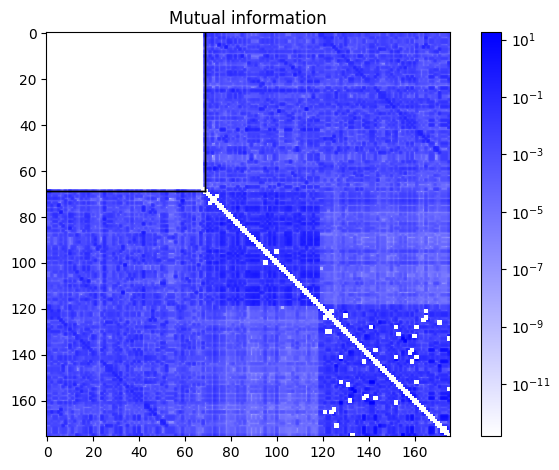

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Mutual information'}>,
 <matplotlib.image.AxesImage at 0x7604a0399150>)

In [ ]:
model.plot(result="MI")

For a clearer analysis, you can display an Escher map of the mutual information between an element of the model and internal components of the system

In [ ]:
model.R["enzyme_ACALD_para"]

acald_c                    -0.596381
coa_c                      -0.178823
nad_c                      -0.172570
accoa_c                     0.295214
h_c                        -0.011939
nadh_c                      0.172570
ac_c                        0.177364
atp_c                      -0.039383
actp_c                      0.310733
adp_c                      -0.007327
cit_c                       0.137711
acon_c                      0.102624
h2o_c                      -0.055214
icit_c                     -0.042892
amp_c                       0.046710
akg_c                       0.085454
co2_c                      -0.328242
succoa_c                   -0.116392
pi_c                        0.002122
3pg_c                      -0.083217
e4p_c                      -0.017456
f6p_c                      -0.071873
g3p_c                       0.018275
g6p_c                      -0.090043
gln_c                       0.331137
glu_c                       0.291182
nadph_c                     0.095445
o

In [ ]:
model.parameters.df

,Mean values,Standard deviation
enzyme_ACALD_para,1.0,1.0
enzyme_ACALDt_para,1.0,1.0
enzyme_ACKr_para,1.0,1.0
enzyme_ACONTa_para,1.0,1.0
enzyme_ACONTb_para,1.0,1.0
enzyme_ACt2r_para,1.0,1.0
enzyme_ADK1_para,1.0,1.0
enzyme_AKGDH_para,1.0,1.0
enzyme_ATPS4r_para,1.0,1.0
enzyme_Biomass_Ecoli_core_w_GAM_para,1.0,1.0


In [ ]:
model.R

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPS4r_para,enzyme_Biomass_Ecoli_core_w_GAM_para,...,h_e_para,co2_e_para,for_e_para,fum_e_para,glc_e_para,h2o_e_para,nh4_e_para,o2_e_para,pi_e_para,succ_e_para
acald_c,-0.596381,1.403619,0.165425,-0.090302,-0.090302,0.165425,-0.021982,-0.006125,-0.125207,-0.002668,...,0.282030,-0.164121,-0.038743,0.021132,0.025745,-0.027607,-0.007283,-0.027457,-0.004909,0.084514
coa_c,-0.178823,-0.178823,-0.084243,0.101171,0.101171,-0.084243,0.021608,-0.074566,0.016564,0.010944,...,-0.598258,0.002036,0.101986,-0.197709,0.025866,0.323565,0.029877,0.048568,0.020137,-0.243107
nad_c,-0.172570,-0.172570,-0.002247,-0.142186,-0.142186,-0.002247,-0.001590,-0.073283,0.230948,0.001229,...,0.575311,0.156897,-0.065772,0.107870,-0.033206,-0.162450,0.003355,-0.010429,0.002261,-0.030602
accoa_c,0.295214,0.295214,0.224754,-0.352087,-0.352087,0.224754,-0.028896,-0.224853,-0.041715,0.004185,...,0.134436,-0.029380,-0.097379,0.049507,0.006607,-0.081098,0.011424,0.001022,0.007700,-0.135459
h_c,-0.011939,-0.011939,0.017361,-0.011718,-0.011718,0.017361,0.003362,-0.008530,0.269760,0.003882,...,0.981987,0.016968,-0.009665,0.010787,0.004338,0.024549,0.010597,-0.028227,0.007142,0.000176
nadh_c,0.172570,0.172570,0.002247,0.142186,0.142186,0.002247,0.001590,0.073283,-0.230948,-0.001229,...,-0.575311,-0.156897,0.065772,-0.107870,0.033206,0.162450,-0.003355,0.010429,-0.002261,0.030602
ac_c,0.177364,0.177364,-0.510875,-0.144477,-0.144477,1.489125,0.006715,-0.048224,-0.253515,0.003539,...,-0.108032,-0.039968,-0.012631,0.009193,0.011720,0.054083,0.009661,0.035106,0.006511,0.088582
atp_c,-0.039383,-0.039383,-0.179794,0.015854,0.015854,-0.179794,0.394485,-0.005186,-0.168364,-0.028712,...,1.123875,0.040913,-0.134953,0.188800,-0.069829,-0.635188,-0.078383,-0.076323,0.947170,-0.158499
actp_c,0.310733,0.310733,0.812458,-0.279391,-0.279391,0.812458,-0.028629,-0.095271,-0.380848,-0.020951,...,0.898618,-0.011555,-0.163798,0.210816,-0.047594,-0.501296,-0.057196,-0.033710,0.961450,0.012156
adp_c,-0.007327,-0.007327,0.003359,-0.005426,-0.005426,0.003359,0.439905,-0.014893,-0.024786,0.003199,...,-0.008819,-0.010501,-0.006082,0.007156,0.005542,-0.001179,0.008732,-0.000628,0.005885,0.006685


In [ ]:
model.R.at["atp_c", "enzyme_GLCpts_para"]

-0.13965783463624795

In [ ]:
model.R.loc["GLCpts"]

enzyme_ACALD_para                      -0.025745
enzyme_ACALDt_para                     -0.025745
enzyme_ACKr_para                       -0.016058
enzyme_ACONTa_para                     -0.008012
enzyme_ACONTb_para                     -0.008012
enzyme_ACt2r_para                      -0.016058
enzyme_ADK1_para                       -0.016627
enzyme_AKGDH_para                      -0.002886
enzyme_ATPS4r_para                      0.014313
enzyme_Biomass_Ecoli_core_w_GAM_para    0.002157
enzyme_CO2t_para                        0.008288
enzyme_CS_para                         -0.008012
enzyme_CYTBD_para                       0.011873
enzyme_ENO_para                         0.079262
enzyme_FBA_para                         0.037107
enzyme_FORti_para                       0.030849
enzyme_FRD7_para                        0.029960
enzyme_FUM_para                        -0.034304
enzyme_FUMt2_2_para                    -0.004344
enzyme_G6PDH2r_para                     0.029187
enzyme_GAPD_para    

In [ ]:
model.R

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPS4r_para,enzyme_Biomass_Ecoli_core_w_GAM_para,...,h_e_para,co2_e_para,for_e_para,fum_e_para,glc_e_para,h2o_e_para,nh4_e_para,o2_e_para,pi_e_para,succ_e_para
acald_c,-0.596381,1.403619,0.165425,-0.090302,-0.090302,0.165425,-0.021982,-0.006125,-0.125207,-0.002668,...,0.282030,-0.164121,-0.038743,0.021132,0.025745,-0.027607,-0.007283,-0.027457,-0.004909,0.084514
coa_c,-0.178823,-0.178823,-0.084243,0.101171,0.101171,-0.084243,0.021608,-0.074566,0.016564,0.010944,...,-0.598258,0.002036,0.101986,-0.197709,0.025866,0.323565,0.029877,0.048568,0.020137,-0.243107
nad_c,-0.172570,-0.172570,-0.002247,-0.142186,-0.142186,-0.002247,-0.001590,-0.073283,0.230948,0.001229,...,0.575311,0.156897,-0.065772,0.107870,-0.033206,-0.162450,0.003355,-0.010429,0.002261,-0.030602
accoa_c,0.295214,0.295214,0.224754,-0.352087,-0.352087,0.224754,-0.028896,-0.224853,-0.041715,0.004185,...,0.134436,-0.029380,-0.097379,0.049507,0.006607,-0.081098,0.011424,0.001022,0.007700,-0.135459
h_c,-0.011939,-0.011939,0.017361,-0.011718,-0.011718,0.017361,0.003362,-0.008530,0.269760,0.003882,...,0.981987,0.016968,-0.009665,0.010787,0.004338,0.024549,0.010597,-0.028227,0.007142,0.000176
nadh_c,0.172570,0.172570,0.002247,0.142186,0.142186,0.002247,0.001590,0.073283,-0.230948,-0.001229,...,-0.575311,-0.156897,0.065772,-0.107870,0.033206,0.162450,-0.003355,0.010429,-0.002261,0.030602
ac_c,0.177364,0.177364,-0.510875,-0.144477,-0.144477,1.489125,0.006715,-0.048224,-0.253515,0.003539,...,-0.108032,-0.039968,-0.012631,0.009193,0.011720,0.054083,0.009661,0.035106,0.006511,0.088582
atp_c,-0.039383,-0.039383,-0.179794,0.015854,0.015854,-0.179794,0.394485,-0.005186,-0.168364,-0.028712,...,1.123875,0.040913,-0.134953,0.188800,-0.069829,-0.635188,-0.078383,-0.076323,0.947170,-0.158499
actp_c,0.310733,0.310733,0.812458,-0.279391,-0.279391,0.812458,-0.028629,-0.095271,-0.380848,-0.020951,...,0.898618,-0.011555,-0.163798,0.210816,-0.047594,-0.501296,-0.057196,-0.033710,0.961450,0.012156
adp_c,-0.007327,-0.007327,0.003359,-0.005426,-0.005426,0.003359,0.439905,-0.014893,-0.024786,0.003199,...,-0.008819,-0.010501,-0.006082,0.007156,0.005542,-0.001179,0.008732,-0.000628,0.005885,0.006685


In [ ]:
model.escher_information(studied="glc_e_para", result="r", model_json=model_path, map_json=map_path)

1.03868168012618


Builder(height=600, metabolite_data={'acald_c': 0.025745199647253685, 'coa_c': 0.02586631650166557, 'nad_c': -…

In [ ]:
model.R

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPS4r_para,enzyme_Biomass_Ecoli_core_w_GAM_para,...,h_e_para,co2_e_para,for_e_para,fum_e_para,glc_e_para,h2o_e_para,nh4_e_para,o2_e_para,pi_e_para,succ_e_para
acald_c,-0.596381,1.403619,0.165425,-0.090302,-0.090302,0.165425,-0.021982,-0.006125,-0.125207,-0.002668,...,0.282030,-0.164121,-0.038743,0.021132,0.025745,-0.027607,-0.007283,-0.027457,-0.004909,0.084514
coa_c,-0.178823,-0.178823,-0.084243,0.101171,0.101171,-0.084243,0.021608,-0.074566,0.016564,0.010944,...,-0.598258,0.002036,0.101986,-0.197709,0.025866,0.323565,0.029877,0.048568,0.020137,-0.243107
nad_c,-0.172570,-0.172570,-0.002247,-0.142186,-0.142186,-0.002247,-0.001590,-0.073283,0.230948,0.001229,...,0.575311,0.156897,-0.065772,0.107870,-0.033206,-0.162450,0.003355,-0.010429,0.002261,-0.030602
accoa_c,0.295214,0.295214,0.224754,-0.352087,-0.352087,0.224754,-0.028896,-0.224853,-0.041715,0.004185,...,0.134436,-0.029380,-0.097379,0.049507,0.006607,-0.081098,0.011424,0.001022,0.007700,-0.135459
h_c,-0.011939,-0.011939,0.017361,-0.011718,-0.011718,0.017361,0.003362,-0.008530,0.269760,0.003882,...,0.981987,0.016968,-0.009665,0.010787,0.004338,0.024549,0.010597,-0.028227,0.007142,0.000176
nadh_c,0.172570,0.172570,0.002247,0.142186,0.142186,0.002247,0.001590,0.073283,-0.230948,-0.001229,...,-0.575311,-0.156897,0.065772,-0.107870,0.033206,0.162450,-0.003355,0.010429,-0.002261,0.030602
ac_c,0.177364,0.177364,-0.510875,-0.144477,-0.144477,1.489125,0.006715,-0.048224,-0.253515,0.003539,...,-0.108032,-0.039968,-0.012631,0.009193,0.011720,0.054083,0.009661,0.035106,0.006511,0.088582
atp_c,-0.039383,-0.039383,-0.179794,0.015854,0.015854,-0.179794,0.394485,-0.005186,-0.168364,-0.028712,...,1.123875,0.040913,-0.134953,0.188800,-0.069829,-0.635188,-0.078383,-0.076323,0.947170,-0.158499
actp_c,0.310733,0.310733,0.812458,-0.279391,-0.279391,0.812458,-0.028629,-0.095271,-0.380848,-0.020951,...,0.898618,-0.011555,-0.163798,0.210816,-0.047594,-0.501296,-0.057196,-0.033710,0.961450,0.012156
adp_c,-0.007327,-0.007327,0.003359,-0.005426,-0.005426,0.003359,0.439905,-0.014893,-0.024786,0.003199,...,-0.008819,-0.010501,-0.006082,0.007156,0.005542,-0.001179,0.008732,-0.000628,0.005885,0.006685


In [ ]:
model.escher_information(studied="atp_c", result="rho", model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'acald_c': 0.039345661687589774, 'coa_c': -0.45414962868357095, 'nad_c': …

In [ ]:
model.escher_information(studied="atp_c", result="MI", model_json=model_path, map_json=map_path)

/home/alequertier/.local/lib/python3.10/site-packages/jupyter_client/session.py:718: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


Builder(height=600, metabolite_data={'acald_c': 0.0007746403046476644, 'coa_c': 0.11549455193764253, 'nad_c': …

The ATP and Biomass production have a negative correlation ?!

In [ ]:
model.enzymes.df

,Concentration / Activity,Reactions linked
enzyme_ACALD,1,[ACALD]
enzyme_ACALDt,1,[ACALDt]
enzyme_ACKr,1,[ACKr]
enzyme_ACONTa,1,[ACONTa]
enzyme_ACONTb,1,[ACONTb]
enzyme_ACt2r,1,[ACt2r]
enzyme_ADK1,1,[ADK1]
enzyme_AKGDH,1,[AKGDH]
enzyme_ATPS4r,1,[ATPS4r]
enzyme_Biomass_Ecoli_core_w_GAM,1,[Biomass_Ecoli_core_w_GAM]


## <font color='green'> [2.4] Reducing the uncertainty by measuring a component </font> 

You can study the influence of the resolution of uncertainty of an element of the model by fixing its value

In [ ]:
SD, mean = model.group_entropy_fixed_vector(elements_to_fixe="atp_c", elements_to_study=[], new_mean_fixed=4.0, return_all=True)

SD

,Old SD,New SD,Delta SD
enzyme_ACALD_para,1.000000,0.999915,0.000085
enzyme_ACALDt_para,1.000000,0.999915,0.000085
enzyme_ACKr_para,1.000000,0.998225,0.001775
enzyme_ACONTa_para,1.000000,0.999986,0.000014
enzyme_ACONTb_para,1.000000,0.999986,0.000014
enzyme_ACt2r_para,1.000000,0.998225,0.001775
enzyme_ADK1_para,1.000000,0.991426,0.008574
enzyme_AKGDH_para,1.000000,0.999999,0.000001
enzyme_ATPS4r_para,1.000000,0.998444,0.001556
enzyme_Biomass_Ecoli_core_w_GAM_para,1.000000,0.999955,0.000045


Fixing a value will lead to a reduction of entropy equal to the amount of information shared with the fixed element

In [ ]:
model.group_entropy_fixed_vector(elements_to_fixe=["atp_c"], elements_to_study=[], new_mean_fixed=[4.0])

,Old H,New H,Delta H
enzyme_ACALD_para,1.918939,1.918853,-0.000085
enzyme_ACALDt_para,1.918939,1.918853,-0.000085
enzyme_ACKr_para,1.918939,1.917162,-0.001777
enzyme_ACONTa_para,1.918939,1.918925,-0.000014
enzyme_ACONTb_para,1.918939,1.918925,-0.000014
enzyme_ACt2r_para,1.918939,1.917162,-0.001777
enzyme_ADK1_para,1.918939,1.910327,-0.008611
enzyme_AKGDH_para,1.918939,1.918937,-0.000001
enzyme_ATPS4r_para,1.918939,1.917381,-0.001558
enzyme_Biomass_Ecoli_core_w_GAM_para,1.918939,1.918893,-0.000045


In [ ]:
frzeve!

SyntaxError: invalid syntax (734136092.py, line 1)

In [ ]:
N_ela = 10
import random

modified_elasticity = []
elasticity_value = []

for i in range(N_ela) :
    flux = random.choice(model.elasticity.s.df.index)
    meta = random.choice(model.elasticity.s.df.columns)
    modified_elasticity.append([flux, meta])

    elasticity_value.append(np.random.uniform(-1.0, 1.0))

model.MOO(modified_elasticity, elasticity_value, print_result=True)

[INFO 2024-07-17 23:37:03] Starting unique-name/2024-07-17-23-37-03-.log!
INFO:unique-name/2024-07-17-23-37-03-.log:Starting unique-name/2024-07-17-23-37-03-.log!
[INFO 2024-07-17 23:37:03] Hi, I am a program, starting now !

INFO:unique-name/2024-07-17-23-37-03-.log:Hi, I am a program, starting now !

DEBUG:unique-name/2024-07-17-23-37-03-.log:<class 'logging.Logger'>
[INFO 2024-07-17 23:37:03] Starting experiment with random seed 42...
INFO:unique-name/2024-07-17-23-37-03-.log:Starting experiment with random seed 42...
DEBUG:unique-name/2024-07-17-23-37-03-.log:generating initial population
DEBUG:unique-name/2024-07-17-23-37-03-.log:evaluating initial population
DEBUG:unique-name/2024-07-17-23-37-03-.log:[Thread 3] Starting evaluation...
DEBUG:unique-name/2024-07-17-23-37-03-.log:[Thread 2] Starting evaluation...
DEBUG:unique-name/2024-07-17-23-37-03-.log:[Thread 0] Starting evaluation...
DEBUG:unique-name/2024-07-17-23-37-03-.log:[Thread 5] Starting evaluation...
DEBUG:unique-name/2

KeyboardInterrupt: 

In [ ]:
ftytu

NameError: name 'ftytu' is not defined

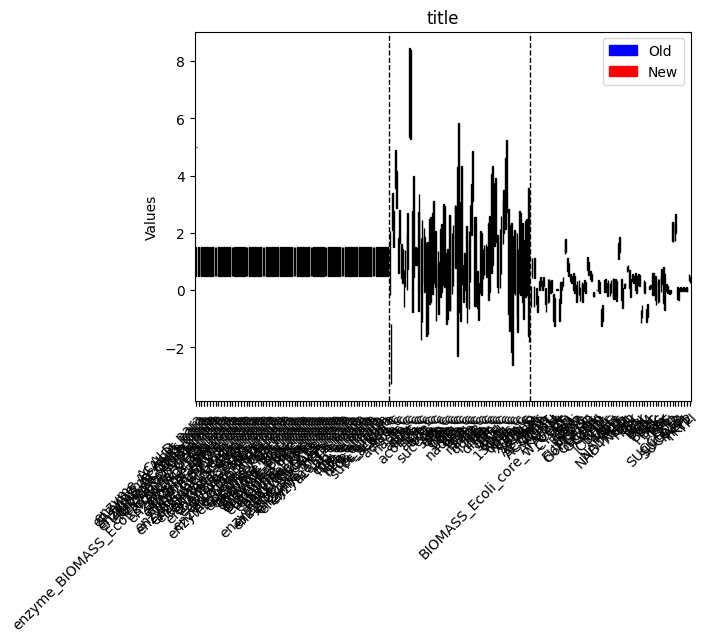

In [ ]:
model.graphic_interface()

Furthermore, fixing an element to a value other than its original mean will lead to a change in the means of every other distributions

In [ ]:
model.escher_mean_deviation(fixed_element="atp_c", fixed_value=4.0, model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'acald_c': 0.7074073170527586, 'coa_c': 0.6400188078909479, 'nad_c': -0.5…

In [ ]:
zret

NameError: name 'zret' is not defined

## <font color='green'> [2.5] regroup enzymes into operons </font> 

Enzymes that are implied in the same task can be initiated by the same genes. In this case, we can regroup them into operons. Then, as parameters they will share a certain covariance. 

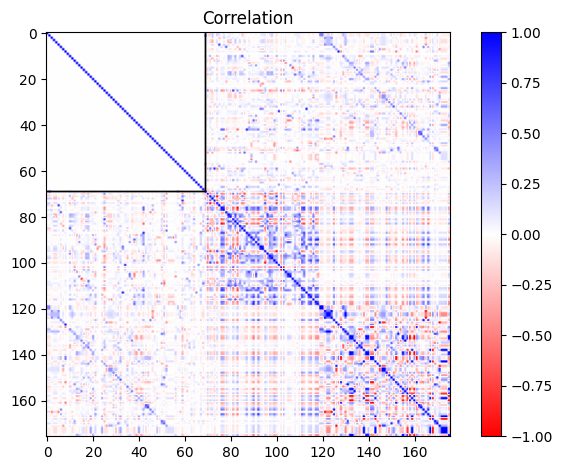

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Correlation'}>,
 <matplotlib.image.AxesImage at 0x70613a2b5c30>)

In [ ]:
model.plot(result="rho")

In [ ]:
enzyme_gly = ["PFK", "FBA", "TPI", "GAPD", "PGK", "PGM", "PYK"]

for i in range(len(enzyme_gly)) :
    enzyme_gly[i] = "enzyme_" + enzyme_gly[i]

model.operons.add(name="Glycolyse", enzymes_linked=enzyme_gly , mixed_covariance=0.5)


enzyme_phosphate = ["G6PDH2r", "GND", "TALA", "TKT2"]

for i in range(len(enzyme_phosphate)) :
    enzyme_phosphate[i] = "enzyme_" + enzyme_phosphate[i]

model.operons.add(name="pentose phosphate", enzymes_linked=enzyme_phosphate , mixed_covariance=0.5)